<div style="background-color:rgba(20, 20, 20, 0.8); color:white; padding:10pt" >    

# **Lab Introduction to Image Processing**
&mdash; **`alain.lebret@ensicaen.fr`** &mdash;

### Part: Frequency Filters


## Introduction

Transitioning from the spatial domain to the frequency domain and vice versa requires the use of three functions from the `fft` module of the *NumPy* library: [`fft2()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html), [`ifft2()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html#numpy.fft.ifft2), and [`fftshift()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html#numpy.fft.fftshift). The input image should preferably be a square image to facilitate the calculation of the Fourier transform. In the case where the image does not have this characteristic, it may be necessary to copy the image to be processed into a larger one, which respects it, and which contains only zeros (black image).

### A Brief Overview of the Fourier Transform

The Fourier transform is an essential tool in signal and image processing, allowing for a transition from a spatial (or temporal) representation to a frequency representation. Mathematically, the 2D Fourier Transform $F(u, v)$ of an image $f(x, y)$ is defined as follows:

$F(u, v) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(x, y) \cdot e^{-j2\pi(ux + vy)} dx dy$

where $u$ and $v$ are the spatial frequencies in $x$ and $y$ respectively, and $j$ is the imaginary unit.

The FFT, or *Fast Fourier Transform*, is an efficient algorithm for calculating the discrete Fourier transform and its inverse, defined as:

$ F(u, v) = \sum\limits_{m=0}^{M-1} \sum\limits_{n=0}^{N-1} f(m, n) \cdot e^{-j2\pi(um/M + vn/N)} $

where $M$ and $N$ are the dimensions of the image. 

Using the FFT significantly reduces computation time, especially for large images.

In the context of frequency filters, the Fourier transform is crucial as it allows us to directly manipulate the frequencies of the image, thus providing a powerful alternative method for image filtering compared to the spatial approach. Frequency filters can be used to attenuate or enhance certain frequencies in the image, which can be used to reduce noise, enhance contrasts, or extract specific information from the image.

## Dépendencies

In [3]:
#
# Loads required libraries 
#
import math
import numpy as np
import skimage                  # scikit-image
from skimage import data        # some images to use
from skimage import io          # open, write, etc. image files
from skimage import color       # conversion between color spaces 
from skimage import filters     # threshold_mean 
from skimage import util        # random_noise 
from skimage import restoration # richardson_lucy 
from skimage.morphology import disk # to use with "median" filter
from scipy import signal        # convolution
from numpy import fft           # FFT
from matplotlib import pyplot as plt

#
# Uncomments the lines below if using Google Colab
#
#from google.colab import drive

In [4]:
root_path = './ressources'
smaller = root_path + '/256x256'
medium = root_path + '/512x512'
various = root_path + '/divers'

1. Generating the Fourier Transform
In the following example, we calculate and display the discrete Fourier transform of the image "girlface.png". The input image is 512 $\times$ 512 pixels in size and is an 8-bit grayscale type.

```python
image = io.imread(medium + '/girlface.png')
fft_image = fft.fft2(image)
```

The quadrants of the discrete Fourier transform have their zero frequency placed at the four corners of the image (**test it out!**), so a "centering" operation of the Fourier transform is performed to place the zero frequency in the center of the image. This operation is carried out using the [`fftshift()`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html#numpy.fft.fftshift) function. Of course, you must repeat the call to fftshift() before any return to the spatial domain (this return being carried out using the `ifft2()` function):

```python
fft_image_shift = fft.fftshift(fft_image)
```

We can then calculate the magnitude of the discrete Fourier transform, taking care to use a logarithmic scale for better visualization.

```python
plt.imshow(np.log(1+np.abs(fft_image_shift)), cmap='magma_r')
```

> Note: here we use the indexed color palette "magma_r" to visualize the FFT modulus. Other palettes are available
(see the page [colormaps.html](https://matplotlib.org/stable/tutorials/colors/colormaps.html)).

The inverse transform is then calculated (after decentering) and displayed as follows:

```python
# puts the FFT back in its initial position
fft_img_mod = np.fft.ifftshift(fft_img_shift)
# calculates the IFFT
img_mod = np.fft.ifft2(fft_img_mod) 
plt.imshow(abs(img_mod), cmap='gray')
```

Note that the Fourier transform and its inverse are complex images. The [`real`](https://numpy.org/doc/stable/reference/generated/numpy.real.html) and [`imag`](https://numpy.org/doc/stable/reference/generated/numpy.imag.html#numpy.imag) attributes allow us to retrieve their real and imaginary parts, and the [`abs()`](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html) and [`angle()`](https://numpy.org/doc/stable/reference/generated/numpy.angle.html) functions retrieve the magnitude and the phase:

```python
real = fft_image.real
imag = fft_image.imag
magnitude = np.abs(fft_image)
angle = np.angle(fft_image)
```

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Exercise No. 1.1**

- Calculate and visualize the 2D Fourier transform of a grayscale image used in the previous session.


---
    
</div>

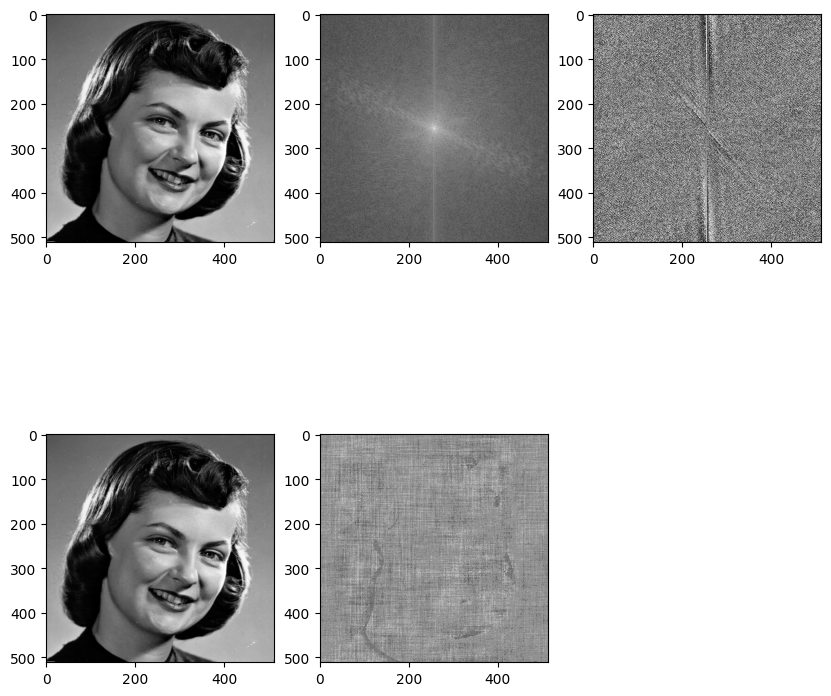

In [5]:
#
# TO COMPLETE WITH YOUR CODE
#

image = io.imread(medium + '/girlface.png')

# do the 2D fourier transform
fft_image = fft.fft2(image)

# shift FFT to the center
fft_image_shift = fft.fftshift(fft_image)

# extract real and phases
real = fft_image_shift.real
phases = fft_image_shift.imag

# create an empty complex array with the shape of the input image
fft_img_shift_mod = np.empty(real.shape, dtype=complex)

# insert real and phases to the new file
fft_img_shift_mod.real = real
fft_img_shift_mod.imag = phases

# reverse shift
fft_img_mod = np.fft.ifftshift(fft_img_shift_mod)

# reverse the 2D fourier transform
img_mod = np.fft.ifft2(fft_img_mod)

# using np.abs gives the scalar value of the complex number
# with img_mod.real gives only real part. 
img_mod = np.abs(img_mod)

# show images
figure = plt.figure(figsize=(10, 10))

figure.add_subplot(2, 3, 1)
plt.imshow(image, cmap='gray')

figure.add_subplot(2, 3, 2)
plt.imshow(np.log(1+np.abs(fft_image_shift)), cmap='gray')

figure.add_subplot(2, 3, 3)
plt.imshow(np.angle(fft_image_shift), cmap='gray')

figure.add_subplot(2, 3, 4)
plt.imshow(img_mod, cmap='gray')

figure.add_subplot(2, 3, 5)
plt.imshow(image-img_mod, cmap='gray')

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Exercise No. 1.2**

- Generate synthetic images containing various shapes (square, rectangle, disk), with various sizes and orientations, then visualize their 2D Fourier transforms: magnitude, phase, real part, imaginary part (the magnitude can also be visualized on a logarithmic scale).
- For these images, calculate the difference image between the original image and the image obtained after FFT and inverse FFT.
- What do we observe? Interpret.

---
    
</div>

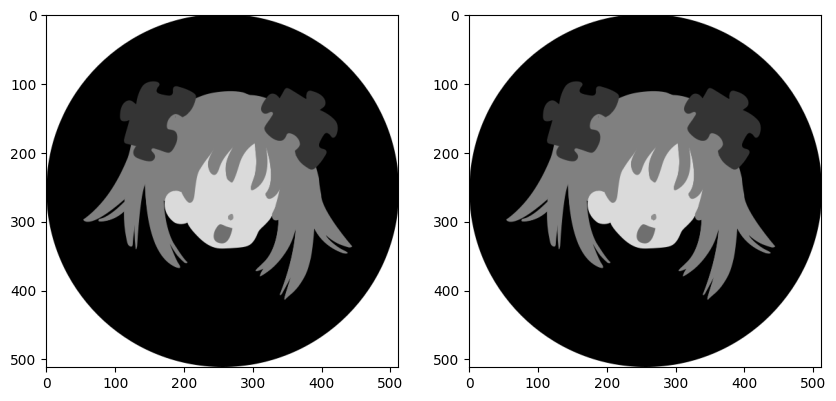

In [25]:
#
# TO COMPLETE WITH YOUR CODE
#

im = io.imread(medium + '/flat.png')
im2 = color.rgb2gray(color.rgba2rgb(im))
fft_ = np.fft.fft2(im2)
fft_shift = np.fft.fftshift(fft_)
im3 = np.fft.ifft2(np.fft.ifftshift(fft_shift))

# ==================================================
# Pour mieux afficher
im3_new = np.abs(im3) #.clip(0,255).astype(np.uint8)
#im3_new = np.abs(im3).clip(0,255).astype(np.uint8)
# ==================================================

# show images
figure = plt.figure(figsize=(10, 10))

figure.add_subplot(1, 2, 1)
plt.imshow(im2, cmap='gray')
figure.add_subplot(1, 2, 2)
plt.imshow(im3_new, cmap='gray')

### Importance of Phase and Magnitude

Most of the energy in the Fourier domain is present at the center of the image, which corresponds to "low-frequency" data in the image domain. "Low-frequency" data corresponds to the many gradual changes in images. Faster changes (such as very sharp contours, for example) will translate into "high frequencies."
The phase is difficult to visually interpret and generally looks like noise. However, it is the phase that contains much of the information needed to reconstruct the image.

The following example proposes to mix the magnitude and phase of two grayscale images of the same size (`im1` and `im2`):

```python
fft1 = fft.fftshift(fft.fft2(im1))
fft2 = fft.fftshift(fft.fft2(im2))

magnitude1 = np.abs(fft1)
magnitude2 = np.abs(fft2)
phase1 = np.angle(fft1)
phase2 = np.angle(fft2)

fft1_new = abs(magnitude1) * np.exp(1j*phase2) # 1j corresponds to the imaginary unit
fft2_new = abs(magnitude2) * np.exp(1j*phase1)

img1_new = np.fft.ifft2(np.fft.ifftshift(fft1_new))
img2_new = np.fft.ifft2(np.fft.ifftshift(fft2_new))

figure = plt.figure(figsize=(10, 10))
figure.add_subplot(1, 2, 1)
plt.imshow(np.abs(img1_new), cmap='gray')
figure.add_subplot(1, 2, 2)
plt.imshow(np.abs(img2_new), cmap='gray')
```

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Exercise No. 1.3

We will illustrate the respective importance of the phase and magnitude of the Fourier transform coefficients. Let's start by swapping the phases of two images:

- Choose two different images, but of the same size, then calculate their respective FFTs (for example, one image with a building and one with a drawing).
- Swap the phases of the two images and display the results.
- What do we observe? Interpret.

---
    
</div>

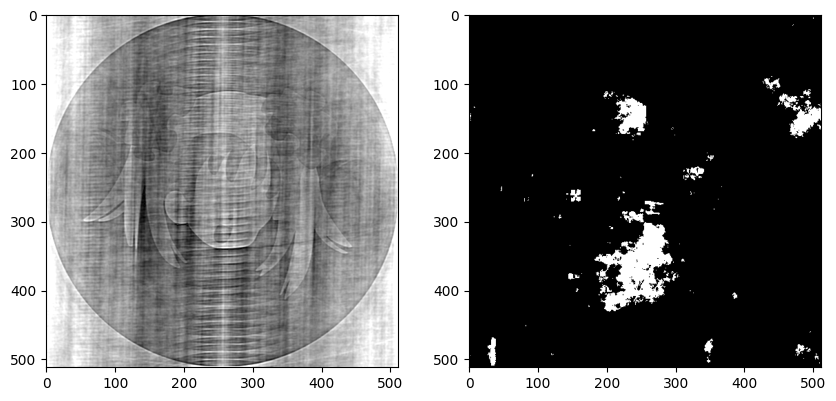

In [8]:
#
# TO COMPLETE WITH YOUR CODE
#


im1 = io.imread(medium + '/defense_512x512.jpg')
im2 = io.imread(medium + '/flat.png')

#im1 = color.rgb2gray(im1)
im2 = color.rgb2gray(color.rgba2rgb(im2))

fft1 = fft.fft2(im1)
fft2 = fft.fft2(im2)

fft1_shift = fft.fftshift(fft1)
fft2_shift = fft.fftshift(fft2)

magnitude1 = np.abs(fft1_shift)
magnitude2 = np.abs(fft2_shift)
phase1 = np.angle(fft1_shift)
phase2 = np.angle(fft2_shift)

fft1_new = abs(magnitude1) * np.exp(1j*phase2)
fft2_new = abs(magnitude2) * np.exp(1j*phase1)

img1_new = np.fft.ifft2(np.fft.ifftshift(fft1_new))
img2_new = np.fft.ifft2(np.fft.ifftshift(fft2_new))

# ==================================================
# Pour mieux afficher
img1_new = np.abs(img1_new).clip(0,255).astype(np.uint8)
img2_new = np.abs(img2_new).clip(0,255).astype(np.uint8)
# ==================================================

# show images
figure = plt.figure(figsize=(10, 10))

figure.add_subplot(1, 2, 1)
plt.imshow(img1_new, cmap='gray')
figure.add_subplot(1, 2, 2)
plt.imshow(img2_new, cmap='gray')

# Les teintes ont été transférées avec la phase.

## 2. Linear Filtering and FFT

### Denoising images

We aim to synthesize filters to get rid of noise in images.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Exercise No. 2.1

- Add noise to the synthetic images previously created.
- Calculate their FFTs and visualize their magnitudes. What do we observe?
- In the spectral domain, synthesize and test different filters to reduce noise (you will find examples of filters at the end of this Jupyter-Lab notebook).
- Compare the results obtained with those of the averaging filters previously seen.
- Apply to a real noisy image that has been previously processed.
    
---
    
</div>

In [ ]:
#
# TO COMPLETE WITH YOUR CODE
#



### Analysis of the Spectrum of an Acquired Image

The image "dust.png" will allow us to highlight certain imperfections present in an image acquired in the laboratory.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Exercise No. 2.2**

- Format the image "dust.png" to remove the text and prepare it for the FFT.
- Visualize the formatted image. What imperfection(s) can be observed? What do you think is the cause?
- Calculate the FFT and visualize its module using a "log" dynamic. How is the imperfection observed on the image spectrum manifested?
- Does this give you an idea of a potential method to correct this imperfection?

---
    
</div>

In [94]:
#
# TO COMPLETE WITH YOUR CODE
#

im = io.imread(various + '/dust.png')
im_gray = color.rgb2gray(im)
im_cropped = im_gray[0:1750, 0:2200] # (0, 0) -> (2200, 1750)

# 
# Imperfections dues au bruit périodique horizontal 
# et au flou PSF
#
fft_im = fft.fft2(im_cropped)
fft_shift = fft.fftshift(fft_im)

# Affiche les images
figure = plt.figure(figsize=(10, 10))

figure.add_subplot(1, 2, 1)
plt.imshow(im_cropped, cmap='gray')
figure.add_subplot(1, 2, 2)
plt.imshow(np.log(1+np.abs(fft_shift)), cmap='gray')



### Elimination of Periodic Patterns Using a Notch Filter

In the following manipulations, we will delve into the practical application of notch filters, exploring their efficacy in mitigating periodic disturbances in images, thereby enhancing the clarity and quality of the visual data.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Exercise No. 2.3**

We aim to synthesize a filter to eliminate artifacts in the image "dust.png" (periodic patterns observed during the previous manipulation). To do this, you will develop a **notch filter template** for different frequency bands that you will need to determine from the previous spectral analysis.

For simplicity, a notch filter for one band will be synthesized in the spectral domain, using a perfect square rejection template. Implement this filter and visualize its spectral response. In particular, for each band to cut, you will need to decide on its width and its central cutoff frequency.

Once the filter is synthesized, apply it to the image. Apply the inverse FFT, then visualize the obtained filtered image. What do we observe?

---
    
</div>

In [95]:
#
# TO COMPLETE WITH YOUR CODE
#




## 3. Deconvolution and Deblurring

Once the original image "dust.png" is filtered, there remains a blur due to the instrumental response of the capture device (PSF - point-spread function) which has degraded some fine details of the images. The PSF of the image "dust.png" is available in the same folder (file "psf_dust.npy").

We now propose to remove the slight blur that remains in this image. Several solutions are available to us.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Exercise No. 4.7**

- Apply the Lucy-Richardson algorithm and the function [`richardson_lucy()`](https://scikit-image.org/docs/stable/api/skimage.restoration.html#skimage.restoration.richardson_lucy) from the `restoration` module using 6 iterations, then 30 iterations. You will need the [`numpy.load()`](https://numpy.org/doc/stable/reference/generated/numpy.load.html) function to load the PSF. Be careful: the `richardson_lucy()` function takes as input an image with real values between 0 and 1 (remember to take the modulus of the inverse Fourier transform, then divide it by the max value)!
- Compare the results obtained.
    
---
    
</div>

Lossy conversion from float64 to uint8. Range [0.08, 232.59999999999997]. Convert image to uint8 prior to saving to suppress this warning.


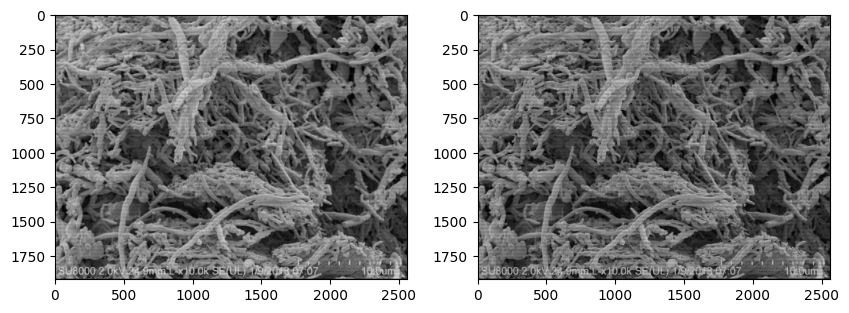

In [11]:
#
# TO COMPLETE WITH YOUR CODE
#


# HOW TO CREATE A PSF 
# Create psf and store to file
# from numpy import save
# psf = np.ones((5, )) / 25
# save(various + '/psf_dust.npy', psf)
#
# Convolve PSF to image and save result
# psf = np.load(various + '/psf_dust.npy')
# from scipy.signal import convolve2d as conv2
# image = io.imread(various + '/dust.png')
# image = color.rgb2gray(image)
# image2 = conv2(image, psf, 'same')
# io.imsave(various + '/dust2.png', image2);

## Load psf
psf = np.load(various + '/psf_dust.npy')
## Load image
image = io.imread(various + '/dust2.png')
#image2 = color.rgb2gray(image)

deconvolved = restoration.richardson_lucy(image2/255.0, psf, 30)

figure = plt.figure(figsize=(10, 10))
figure.add_subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
figure.add_subplot(1, 2, 2)
plt.imshow(deconvolved, cmap='gray')



-----

## Annex Codes

### A1. Creating Shapes

#### White Rectangle on a Black Background

```python
shape = (512, 512)
rectangle = np.zeros(shape, dtype=np.uint8)
upper_left_corner = (250, 40)
lower_right_corner = (262, 472)
rr, cc = skimage.draw.rectangle(start=upper_left_corner, 
                                end=lower_right_corner, 
                                shape=shape)
rectangle[rr, cc] = 1
```

#### White Disk on a Black Background

```python
shape = (512, 512)
center = (256, 256)
radius = 50
disk = np.zeros(shape, dtype=np.uint8)
rr, cc = skimage.draw.disk(center, radius, shape=shape)
disk[rr, cc] = 1
```

### A2. Some Image Operations

#### Extract a Sub-Image

```python
upper_left_corner = (50, 100)
lower_right_corner = (50, 50)
cropped = skimage.util.crop(image, 
                            (upper_left_corner, lower_right_corner, (0,0)),
                            copy=False)
```

### A3. Some Filters

#### Ideal Low-Pass and High-Pass Filters

```python
def distance(point1, point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0, imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base
```

#### Butterworth Low-Pass and High-Pass Filters

```python
def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base
```

#### Gaussian Low-Pass and High-Pass Filters

```python
def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base
```

#### Example of Using Filters

```python
image = io.imread(medium + '/girlface.png')

# show images
figure = plt.figure(figsize=(10, 10))

figure.add_subplot(3, 3, 1)
plt.imshow(image, cmap='gray')

original = np.fft.fft2(image)
figure.add_subplot(3, 3, 2)
plt.imshow(np.log(1+np.abs(original)), cmap='gray')

center = np.fft.fftshift(original)
figure.add_subplot(3, 3, 3)
plt.imshow(np.log(1+np.abs(center)), cmap='gray')

LowPassCenter = center * idealFilterLP(50, image.shape)
figure.add_subplot(3, 3, 4)
plt.imshow(np.log(1+np.abs(LowPassCenter)), cmap='gray')

LowPass = np.fft.ifftshift(LowPassCenter)
figure.add_subplot(3, 3, 5)
plt.imshow(np.log(1+np.abs(LowPass)), cmap='gray')

inverse_LowPass = np.fft.ifft2(LowPass)
figure.add_subplot(3, 3, 5)
plt.imshow(np.abs(inverse_LowPass), cmap='gray')
```